In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd
import sympy as sp

# №1

$$
f(x, a) = \sqrt{x+a} - \sqrt{x} = \frac{(\sqrt{x+a} - \sqrt{x})(\sqrt{x+a} + \sqrt{x})}{\sqrt{x+a} + \sqrt{x}} = \frac{a}{\sqrt{x+a} + \sqrt{x}}
$$

# №2

In [2]:
from mpmath import *
mp.dps = 64 # precision (in decimal places)
x = mp.power(10, 100)
mp.tan(x)

mpf('0.4320458056166690197593783572604528727053527543871788951777017692104')

$$ f(x) = tan(x)$$

$$\kappa = \frac{\Vert J(x) \Vert}{\Vert f(x)\Vert / \Vert x \Vert} = \frac{x}{cos^2(x)tan(x)} $$ 

In [3]:
kappa = x/(mp.power(mp.cos(x), 2) * mp.tan(x))
kappa

mpf('2.746615203119965593780244375369625727567014698359612771954891971648e+100')

$$\kappa \approx 2.75*10^{100}$$
Нужно хранить 100 + 7 = 107 чисел

# №3

In [4]:
def quad(b: float, c: float):
    b = mpf(b)
    c = mpf(c)
    D = b ** 2 - 4 * c + 0J
    rootD = sqrt(D)
    x1 = -(b + rootD) / 2
    x2 = -(b - rootD) / 2
    return (x1, x2)

tests = [
        { 'b': 4.0 ,  'c': 3.0} ,
        { 'b': 2.0 ,  'c': 1.0} ,
        { 'b': 0.5 ,  'c': 4.0} ,
        { 'b': 1e10 , 'c': 3.0} ,
        { 'b': -1e10, 'c': 4.0}]

for test in tests:
    b, c = test["b"], test["c"]
    x1, x2 = quad(b, c)
    # нативные тесты через теорему Виета
    print("X:", x1, x2)
    print("Check 1:", x1 + x2, -b, x1 + x2 == -b)
    print("Check 2:", x1*x2, c, x1*x2 == c)
    print("="*10)
# пусть не везде True, но по числам видно, что очень близкие числа
# (не с mpf хуже)

X: (-3.0 + 0.0j) (-1.0 + 0.0j)
Check 1: (-4.0 + 0.0j) -4.0 True
Check 2: (3.0 + 0.0j) 3.0 True
X: (-1.0 + 0.0j) (-1.0 + 0.0j)
Check 1: (-2.0 + 0.0j) -2.0 True
Check 2: (1.0 + 0.0j) 1.0 True
X: (-0.25 - 1.984313483298442942876211815229445319282694387311837635276250844j) (-0.25 + 1.984313483298442942876211815229445319282694387311837635276250844j)
Check 1: (-0.5 + 0.0j) -0.5 True
Check 2: (4.0 + 0.0j) 4.0 True
X: (-9999999999.99999999969999999999999999999099999999999999999946 + 0.0j) (-0.0000000003000000000000000000090000000000000000005400000055458461948383576 + 0.0j)
Check 1: (-10000000000.0 + 0.0j) -10000000000.0 True
Check 2: (3.000000000000000000000000000000000000000000000055458461947978576 + 0.0j) 3.0 False
X: (0.00000000040000000000000000001600000000000000000128000001621267028898702 + 0.0j) (9999999999.99999999959999999999999999998399999999999999999872 + 0.0j)
Check 1: (10000000000.0 + 0.0j) 10000000000.0 True
Check 2: (4.0000000000000000000000000000000000000000000001621267028885902

# №4

Absolute kappa: 5.151659956362178e-09
Relative kappa: 2081735906.706108


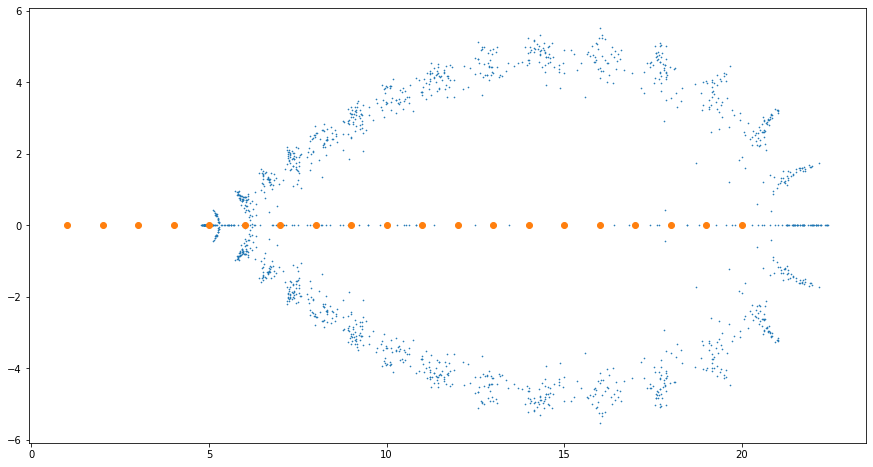

In [5]:
r = 20
n_exp = 100

start_roots = np.arange(1, r+1)
start_coefs = np.polynomial.polynomial.polyfromroots(start_roots)

real_parts, imag_parts = np.zeros((r, n_exp)), np.zeros((r, n_exp))

for i in range(n_exp):
    normal_realization = np.random.normal(1, 10**-10, r+1)
    coefs = start_coefs * normal_realization
    roots = np.polynomial.polynomial.polyroots(coefs)
    real_parts[:,i] = np.real(roots)
    imag_parts[:,i] = np.imag(roots)
    # один выводим, чтобы посчитать kappas
    if i == n_exp - 10:
        abs_kappa = np.linalg.norm(roots - start_roots)/np.linalg.norm(coefs - start_coefs)
        rel_kappa = ((np.linalg.norm(roots - start_roots)/np.linalg.norm(roots))/
                (np.linalg.norm(coefs - start_coefs)/np.linalg.norm(coefs)))
        print("Absolute kappa:", abs_kappa)
        print("Relative kappa:", rel_kappa) # много...
plt.figure(figsize=(15, 8))
plt.scatter(real_parts.flatten(), imag_parts.flatten(), s=0.4)
plt.scatter(start_roots, np.zeros(r))
plt.show()

# №5

In [6]:
from mpmath import mp, mpf
mp.dps = 64 # precision (in decimal places)

def f_mpf(n, alpha):
    f = mp.zeros(1, n + 1)
    f[0] = mp.log(1 + 1 / mpf(alpha))
    for i in range(1, n + 1):
        f[i] = 1 / mpf(i) - mpf(alpha) * f[i - 1]
    return f

def f_dt(dtype, n, alpha):
    f = np.zeros(n + 1, dtype=dtype)
    f[0] = np.log(1 + 1 / np.array(alpha, dtype=dtype))
    for i in range(1, n + 1):
        f[i] = 1 / np.array(i, dtype=dtype) - np.array(alpha, dtype=dtype) * f[i - 1]

    return f

def compare(dtype, n, alpha):
    diff = f_mpf(n, alpha) - f_dt(dtype, n, alpha)
    diff /= np.finfo(dtype).eps

N = 20
print(f_dt(np.float64, N, 0.1)[N])
print(f_mpf(N, 0.1)[N])
print("="*30)
print(f_dt(np.float64, N, 10.0)[N])
print(f_mpf(N, 10.0)[N])

0.045239221952429354
0.04523922195242935245858041690393530986774908073160529352111067169
7483.468021084803
0.004347035818028109090259473900056452612527289123945727091920103668


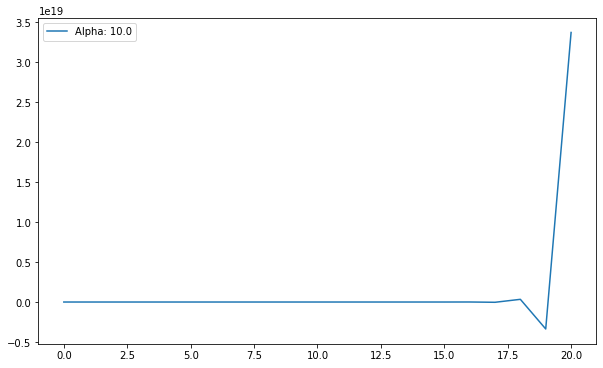

In [7]:
alpha_ = 10.0
diff = f_dt(np.float64, 20, alpha_) - f_mpf(20, alpha_)
diff /= np.finfo(np.float64).eps
plt.figure(figsize=(10, 6))
plt.plot(diff, label = f"Alpha: {alpha_}")
plt.legend()

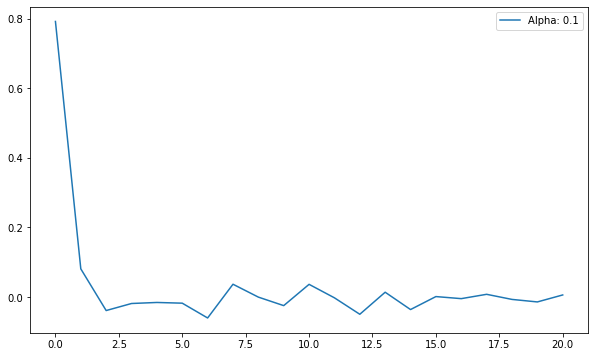

In [8]:
alpha_ = 0.1
diff = f_dt(np.float64, 20, alpha_) - f_mpf(20, alpha_)
diff /= np.finfo(np.float64).eps
plt.figure(figsize=(10, 6))
plt.plot(diff, label = f"Alpha: {alpha_}")
plt.legend()

# №6

In [9]:
# Part 1
eps = sp.Symbol('\\epsilon')
A = sp.Matrix([ [ 1, 1 ], [ 1, 1 + eps ], [ 1, 1 + eps ] ])
b = sp.Matrix([ [ 2 ], [ eps ], [ 4 + eps ] ])
x = sp.simplify((A.T @ A).inv() @ A.T @ b)
x

Matrix([
[1],
[1]])

In [10]:
y = A @ x
y

Matrix([
[           2],
[\epsilon + 2],
[\epsilon + 2]])

In [11]:
# Part 2
x = np.array([1,1])

def np_solution(A, b, dtype):
    A_dtype = np.array(A, dtype = dtype)
    b_dtype = np.array(b, dtype = dtype)
    return np.linalg.inv(A_dtype.T @ A_dtype) @ A_dtype.T @ b_dtype

eps = 10**-5
A = np.array([[1, 1],[1, 1+eps],[1, 1+eps]], dtype = np.float32)
b = np.array([2, eps, 4 + eps], dtype = np.float32)

print(f'Single precision:', np_solution(A,b, np.float32)) # not close at all
print(f'Double precision:', np_solution(A,b, np.float64)) # close

Single precision: [1612.1589 1461.854 ]
Double precision: [1.00066928 0.99932138]


In [12]:
# Part 3
def svd_solution(A, b):
    u, s, vh = np.linalg.svd(A, full_matrices=False)
    b_ = u.T @ b
    x_ = np.linalg.solve(np.diag(s), b_)
    return vh.T @ x_

print(f'SVD:', svd_solution(A, b)) # close
# more numerically stable, cause with np.float32 the np_solution gives bad result, and svd is OK

SVD: [0.9957283 1.0042715]


In [13]:
# Part 4
print(f'np.linalg.lstsq', np.linalg.lstsq(A, b, rcond=None)[0]) # close, uses SVD

np.linalg.lstsq [1.0006781 0.9993219]


# №7